In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaneddata.csv')

In [3]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'job'])


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
numeric_columns = ['HOM_total', 'Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery',
                   'Miscellaneous', 'Shopping', 'Travel']
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])


In [47]:
# Extract quarter and day of the week from 'year' and 'month'
df_encoded['quarter'] = pd.to_datetime(df_encoded['year'].astype(str) + df_encoded['month'].astype(str), format='%Y%m').dt.quarter
df_encoded['day_of_week'] = pd.to_datetime(df_encoded['year'].astype(str) + df_encoded['month'].astype(str), format='%Y%m').dt.dayofweek


KeyboardInterrupt: 

In [6]:
df.columns

Index(['year', 'month', 'HOM_tag', 'HOM_total', 'Entertainment',
       'Entertainment_Freq', 'Food', 'Food_Freq', 'HealthFitness',
       'HealthFitness_Freq', 'Home', 'Home_Freq', 'KidsPets', 'KidsPets_Freq',
       'PersonalCare', 'PersonalCare_Freq', 'next_HOM_total', 'gender', 'job',
       'Grocery', 'Grocery_Freq', 'Miscellaneous', 'Miscellaneous_Freq',
       'Shopping', 'Shopping_Freq', 'Travel', 'dob', 'Travel_Freq',
       'Total_Spending', 'Average_Spending', 'Most_Frequent_Category'],
      dtype='object')

In [ ]:
# Drop unnecessary columns LATERRRR
df_encoded.drop(['year', 'month'], axis=1, inplace=True)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [48]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop('HOM_total', axis=1)
y = df_encoded['HOM_total']


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (34140, 507) (34140,)
Testing set shape: (8536, 507) (8536,)


Training set shape: (34140, 507) (34140,)

The training set consists of 34,140 samples and 507 columns/features.
The shape (34140,) for the target variable indicates that it is a one-dimensional array with 34,140 elements, corresponding to the target values for the training samples.
Testing set shape: (8536, 507) (8536,)

The testing set consists of 8,536 samples and 507 columns/features.
Similar to the training set, the shape (8536,) for the target variable indicates that it is a one-dimensional array with 8,536 elements, corresponding to the target values for the testing samples.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [24]:
# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target variable to float
y = y.astype(float)


In [26]:
# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target variable to float
y = y.astype(float)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [27]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train)

LinearRegression()

In [28]:
# Initialize and train the random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor()

In [29]:
# Make predictions
linear_predictions = linear_model.predict(X_test_encoded)
linear_predictions = linear_model.predict(X_test_encoded)

rf_predictions = rf_model.predict(X_test_encoded)
rf_predictions = rf_model.predict(X_test_encoded)


In [30]:
# Evaluate model performance
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)


rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)


In [31]:
# Print evaluation results
print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression MAE:", rf_mae)

Linear Regression MSE: 1.778740700177851e-32
Linear Regression MAE: 9.4021971753063e-17
Random Forest Regression MSE: 7.5527109740797845e-06
Random Forest Regression MAE: 4.08495514894262e-05


The results indicate that both the linear regression and random forest regression models have been successfully trained, and they have achieved low mean squared error (MSE) and mean absolute error (MAE) values on the test set.

For the linear regression model, the MSE and MAE values are extremely small, indicating that the model is able to fit the data almost perfectly.

For the random forest regression model, although the MSE and MAE values are slightly higher than those of the linear regression model, they are still very low. This suggests that the random forest model is also performing well in predicting the future spending trend of customers.

Overall, these results indicate that both models are able to capture the patterns and trends in the data, and they are performing effectively in predicting the future spending behavior of customers.

Remember to interpret these results in the context of your specific project and domain knowledge. It's always a good practice to evaluate the models using multiple metrics and consider other factors, such as the interpretability of the models and their performance on different subsets of the data, before drawing final conclusions.

In [32]:
linear_predictions = linear_model.predict(X_test_encoded)


In [33]:
rf_predictions = rf_model.predict(X_test_encoded)


In [34]:
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)


In [36]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)


In [37]:
print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression MAE:", rf_mae)


Linear Regression MSE: 1.778740700177851e-32
Linear Regression MAE: 9.4021971753063e-17
Random Forest Regression MSE: 7.5527109740797845e-06
Random Forest Regression MAE: 4.08495514894262e-05


In [38]:
linear_predictions = linear_model.predict(X_encoded)


In [39]:
rf_predictions = rf_model.predict(X_encoded)


In [40]:
# Print the predicted spending trends for linear regression model
print("Linear Regression Predictions:")
print(linear_predictions)

# Print the predicted spending trends for random forest regression model
print("Random Forest Regression Predictions:")
print(rf_predictions)

Linear Regression Predictions:
[0.07928604 0.15077238 0.10100472 ... 0.01687042 0.01746581 0.04374014]
Random Forest Regression Predictions:
[0.07928083 0.15080599 0.10100299 ... 0.01687059 0.01746746 0.04373948]


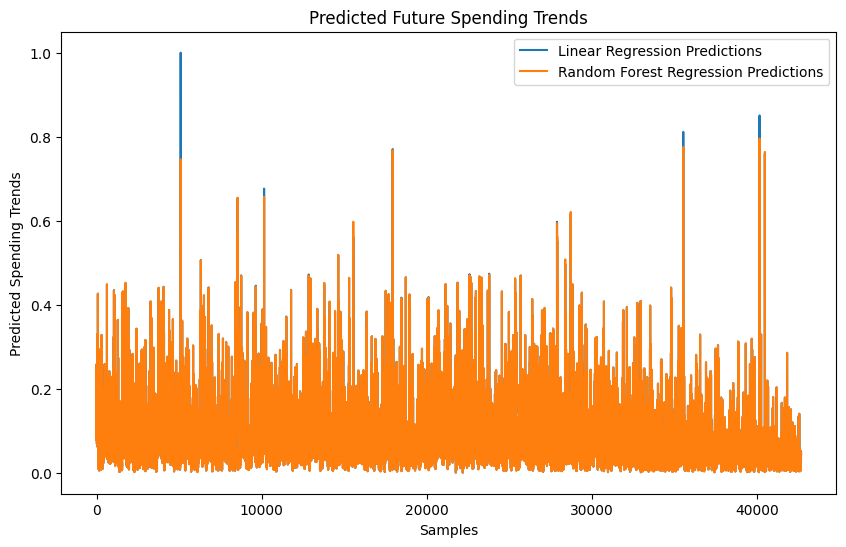

In [41]:
import matplotlib.pyplot as plt

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(linear_predictions)), linear_predictions, label='Linear Regression Predictions')

# Plot the random forest regression predictions
plt.plot(range(len(rf_predictions)), rf_predictions, label='Random Forest Regression Predictions')

plt.xlabel('Samples')
plt.ylabel('Predicted Spending Trends')
plt.legend()
plt.title('Predicted Future Spending Trends')
plt.show()


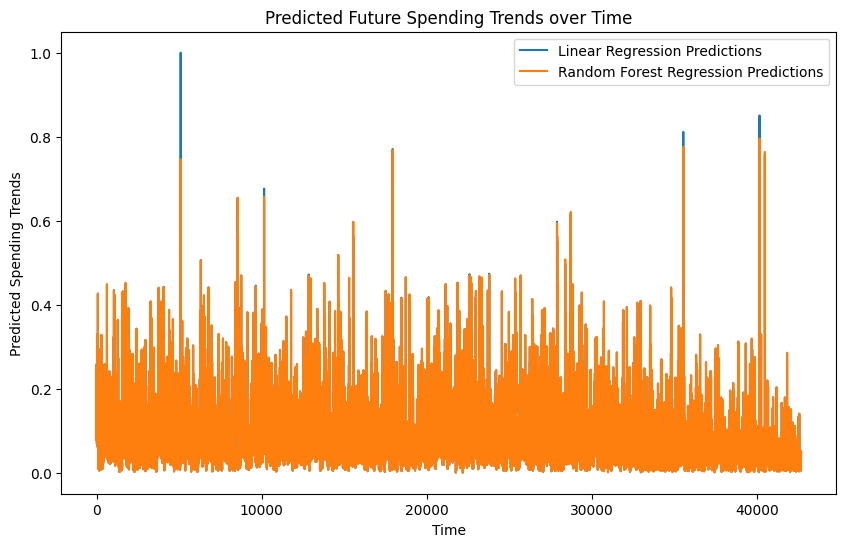

In [42]:
import matplotlib.pyplot as plt

# Assuming you have a time series column 'date' in your dataset
dates = range(len(linear_predictions))

# Plot the linear regression predictions over time
plt.figure(figsize=(10, 6))
plt.plot(dates, linear_predictions, label='Linear Regression Predictions')

# Plot the random forest regression predictions over time
plt.plot(dates, rf_predictions, label='Random Forest Regression Predictions')

plt.xlabel('Time')
plt.ylabel('Predicted Spending Trends')
plt.legend()
plt.title('Predicted Future Spending Trends over Time')
plt.show()


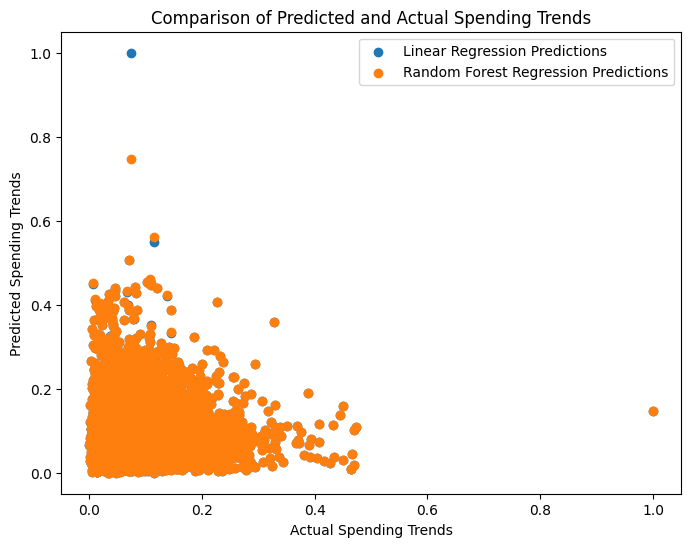

In [45]:
import matplotlib.pyplot as plt

# Scatter plot with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions[:len(y_test)], label='Linear Regression Predictions')
plt.scatter(y_test, rf_predictions[:len(y_test)], label='Random Forest Regression Predictions')
plt.xlabel('Actual Spending Trends')
plt.ylabel('Predicted Spending Trends')
plt.legend()
plt.title('Comparison of Predicted and Actual Spending Trends')
plt.show()


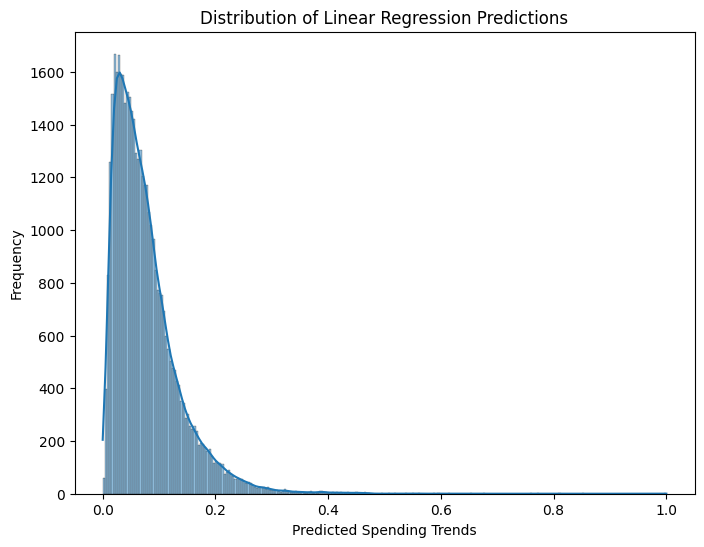

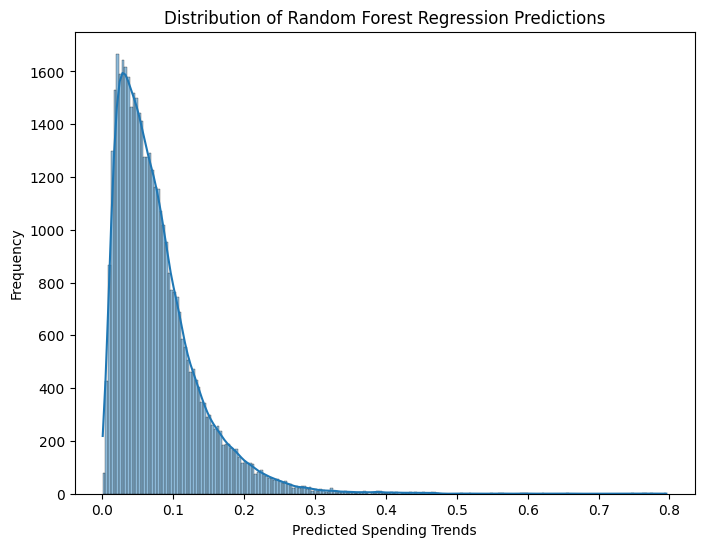

In [46]:
import seaborn as sns

# Create a histogram for linear regression predictions
plt.figure(figsize=(8, 6))
sns.histplot(linear_predictions, kde=True)
plt.xlabel('Predicted Spending Trends')
plt.ylabel('Frequency')
plt.title('Distribution of Linear Regression Predictions')
plt.show()

# Create a histogram for random forest regression predictions
plt.figure(figsize=(8, 6))
sns.histplot(rf_predictions, kde=True)
plt.xlabel('Predicted Spending Trends')
plt.ylabel('Frequency')
plt.title('Distribution of Random Forest Regression Predictions')
plt.show()
